<h1>State of Energy in Australia</h1>

In [2]:
# This notebook will explore the following dataset provided by the Department of Climate Change, Energy, the Environment and Water (DCCEEW)
# The title of the dataset is "Australian electricity generation, by state and territory, by fuel type, physical units"
# Link to the dataset: https://www.energy.gov.au/publications/australian-energy-statistics-table-o-electricity-generation-fuel-type-2020-21-and-2021

In [3]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Australian Energy Statistics, Table O Electricity generation by fuel type 2021-22 and 2022</h2>

Australian Energy Statistics 2023 from the Department of Climate Change, 
Energy, the Environment and Water (DCCEEW).

In [4]:
# Creating data frame
# We will look at Table O1.1 
# "Australian electricity generation, by fuel type, physical units, financial year"

df_ausElecGen = pd.read_excel("datasets/Australian Energy Statistics 2023 Table O_0(1).xlsx", sheet_name="AUS FY")

print(df_ausElecGen)

    Unnamed: 0                                         Unnamed: 1 Unnamed: 2  \
0          NaN                                         Table O1.1        NaN   
1          NaN  Australian electricity generation, by fuel typ...        NaN   
2          NaN                                                NaN        NaN   
3          NaN                                                NaN    1989-90   
4          NaN                                                NaN        GWh   
5          NaN                                Non-renewable fuels        NaN   
6          NaN                                         Black coal      87573   
7          NaN                                         Brown coal      33594   
8          NaN                                        Natural gas      14359   
9          NaN                                       Oil products       3552   
10         NaN                                            Other a        NaN   
11         NaN                          

In [5]:
# It is not foramtted that well.
# Lets clean this in excel and seperate the non-renewable and renewable sources

# Non renewable source use
df_ausElecGen_nonRenew = pd.read_excel("datasets/AES_Table01.1.xlsx", sheet_name="non-renew")

# Renewable source use
df_ausElecGen_Renew = pd.read_excel("datasets/AES_Table01.1.xlsx", sheet_name="renew")

In [6]:
# Lets transpose these since the years are the columns and the sources are the rows.
df_ausElecGen_nonRenew = df_ausElecGen_nonRenew.T.copy()
df_ausElecGen_Renew = df_ausElecGen_Renew.T.copy()

<h3>Cleaning and Visualising the Non Renewable Energy Sources dataframe</h3>

In [7]:
# Lets have a peek at the Non Renewable dataframe
df_ausElecGen_nonRenew.head()

,0,1,2,3,4,5,6,7
Unnamed: 0,NaN,Non-renewable fuels,Black coal,Brown coal,Natural gas,Oil products,Other a,Total non-renewable
1989-90,GWh,NaN,87573,33594,14359,3552,NaN,139078
1990-91,GWh,NaN,89511,36048,10772,3396,NaN,139727
1991-92,GWh,NaN,94325.1,34559,11633,2362,NaN,142879.1
1992-93,GWh,NaN,97872.7,33248,12295,2421,NaN,145836.7


In [8]:
df_ausElecGen_nonRenew.columns = df_ausElecGen_nonRenew.iloc[0]
df_ausElecGen_nonRenew = df_ausElecGen_nonRenew.drop(df_ausElecGen_nonRenew.index[0])
print(df_ausElecGen_nonRenew.columns)

Index([                  nan, 'Non-renewable fuels',        '  Black coal',
              '  Brown coal',       '  Natural gas',      '  Oil products',
                 '  Other a', 'Total non-renewable'],
      dtype='object', name='Unnamed: 0')


In [9]:
# Lets drop:
# - Non-renewable fuels
# - Total non-renewable

df_ausElecGen_nonRenew = df_ausElecGen_nonRenew.drop(columns=['Non-renewable fuels','Total non-renewable'])

df_ausElecGen_nonRenew

Unnamed: 0,NaN,Black coal,Brown coal,Natural gas,Oil products,Other a
1989-90,GWh,87573,33594,14359,3552,NaN
1990-91,GWh,89511,36048,10772,3396,NaN
1991-92,GWh,94325.1,34559,11633,2362,NaN
1992-93,GWh,97872.7,33248,12295,2421,NaN
1993-94,GWh,100544.1,34890,12199,2320,NaN
1994-95,GWh,102522.1,35832,14913,2738,NaN
1995-96,GWh,106089.6,39427,12445,2805,NaN
1996-97,GWh,109452.2,41893,11426,2175,NaN
1997-98,GWh,116969.5,46633,12934,1821,NaN
1998-99,GWh,118586.3,49703,16001,1729,NaN


In [10]:
# To get read of the "NaN" column that is displaying the unit of energy
df_ausElecGen_nonRenew = df_ausElecGen_nonRenew[['  Black coal',
              '  Brown coal',       '  Natural gas',      '  Oil products',
                 '  Other a']].copy()

In [11]:
# Here is our cleaned Non Renwable Sources Data Frame
df_ausElecGen_nonRenew

Unnamed: 0,Black coal,Brown coal,Natural gas,Oil products,Other a
1989-90,87573,33594,14359,3552,NaN
1990-91,89511,36048,10772,3396,NaN
1991-92,94325.1,34559,11633,2362,NaN
1992-93,97872.7,33248,12295,2421,NaN
1993-94,100544.1,34890,12199,2320,NaN
1994-95,102522.1,35832,14913,2738,NaN
1995-96,106089.6,39427,12445,2805,NaN
1996-97,109452.2,41893,11426,2175,NaN
1997-98,116969.5,46633,12934,1821,NaN
1998-99,118586.3,49703,16001,1729,NaN


<h4>Time Series Visualisation of Non Renewable Energy Source Usage</h4>

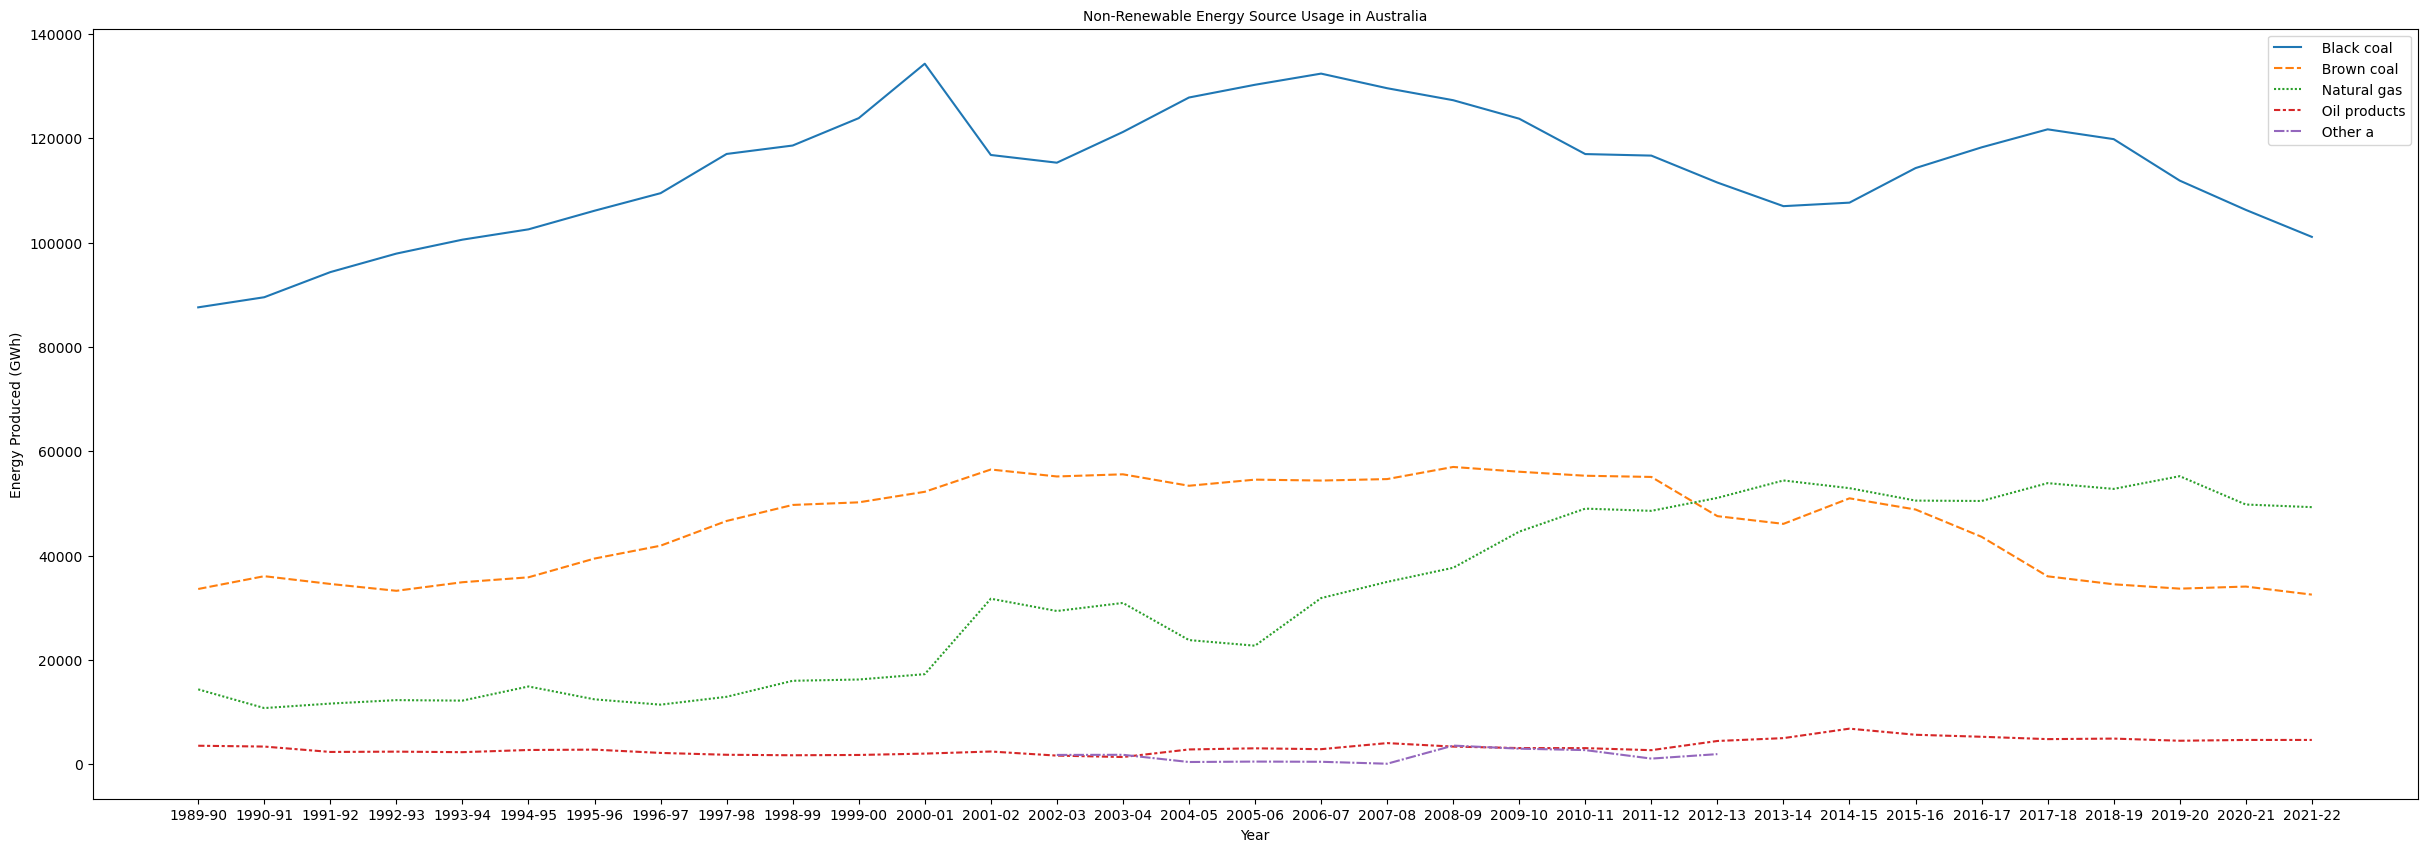

In [12]:
# Resizing our plot [Must be placed prior to creation of plot instance]
plt.figure(figsize=(30, 10))

# Lets visualise our Non Renewable Energy Data Frame as a lineplot since it is a time series
nonRenewLineplot = sns.lineplot(df_ausElecGen_nonRenew)

# Repositioning the legend
nonRenewLineplot.legend(loc='upper right')

# Setting the position of the x and y labels
nonRenewLineplot.set_xlabel('Year', fontsize=10)
nonRenewLineplot.set_ylabel('Energy Produced (GWh)', fontsize=10)

# Adjusting the position of the title
nonRenewLineplot.set_title('Non-Renewable Energy Source Usage in Australia', fontsize=10)
nonRenewLineplot.title.set_position([.5, 1.0])

# Display our plot
plt.show()

<h3>Cleaning and Visualising the Renewable Energy Sources dataframe</h3>

In [13]:
# Lets have a peek at the Renewable dataframe
df_ausElecGen_Renew.head()

,0,1,2,3,4,5,6,7,8,9,10
Unnamed: 0,NaN,"Bagasse, wood",Biogas,Wind,Hydro,Large-scale solar PV,Small-scale solar PV,Geothermal,Total renewable,NaN,Total
1989-90,GWh,750,NaN,NaN,14880,NaN,NaN,NaN,15630,NaN,154708
1990-91,GWh,769,NaN,NaN,16103,NaN,NaN,NaN,16872,NaN,156599
1991-92,GWh,670,NaN,NaN,15768,NaN,10.9,NaN,16448.9,NaN,159328
1992-93,GWh,670,NaN,NaN,16953,NaN,13.3,NaN,17636.3,NaN,163473


In [14]:
# Lets remove the top redundant row
df_ausElecGen_Renew.columns = df_ausElecGen_Renew.iloc[0]
df_ausElecGen_Renew = df_ausElecGen_Renew.drop(df_ausElecGen_Renew.index[0])
print(df_ausElecGen_Renew.columns)

Index([                     nan,        '  Bagasse, wood',
                     '  Biogas',                 '  Wind',
                      '  Hydro', '  Large-scale solar PV',
       '  Small-scale solar PV',           '  Geothermal',
              'Total renewable',                      nan,
                        'Total'],
      dtype='object', name='Unnamed: 0')


In [15]:
# Proper view of our renewable dataframe
df_ausElecGen_Renew.head()

Unnamed: 0,NaN,"Bagasse, wood",Biogas,Wind,Hydro,Large-scale solar PV,Small-scale solar PV,Geothermal,Total renewable,NaN,Total
1989-90,GWh,750,NaN,NaN,14880,NaN,NaN,NaN,15630,NaN,154708
1990-91,GWh,769,NaN,NaN,16103,NaN,NaN,NaN,16872,NaN,156599
1991-92,GWh,670,NaN,NaN,15768,NaN,10.9,NaN,16448.9,NaN,159328
1992-93,GWh,670,NaN,NaN,16953,NaN,13.3,NaN,17636.3,NaN,163473
1993-94,GWh,670,NaN,4,16649,NaN,15.9,NaN,17338.9,NaN,167292


In [16]:
# We want to be able to visualise time series data of the various renewable sources, so we will re-assign only the 
# relevant columns to be present in the data frame like we did with the non-renewable sources

df_ausElecGen_Renew = df_ausElecGen_Renew[['  Bagasse, wood',
                     '  Biogas',                 '  Wind',
                      '  Hydro', '  Large-scale solar PV',
       '  Small-scale solar PV',           '  Geothermal']].copy()

In [17]:
# Our cleaned Renewable Sources data frame
df_ausElecGen_Renew.head()

Unnamed: 0,"Bagasse, wood",Biogas,Wind,Hydro,Large-scale solar PV,Small-scale solar PV,Geothermal
1989-90,750,NaN,NaN,14880,NaN,NaN,NaN
1990-91,769,NaN,NaN,16103,NaN,NaN,NaN
1991-92,670,NaN,NaN,15768,NaN,10.9,NaN
1992-93,670,NaN,NaN,16953,NaN,13.3,NaN
1993-94,670,NaN,4,16649,NaN,15.9,NaN


<h4>Time Series Visualisation of Renewable Energy Source Usage</h4>

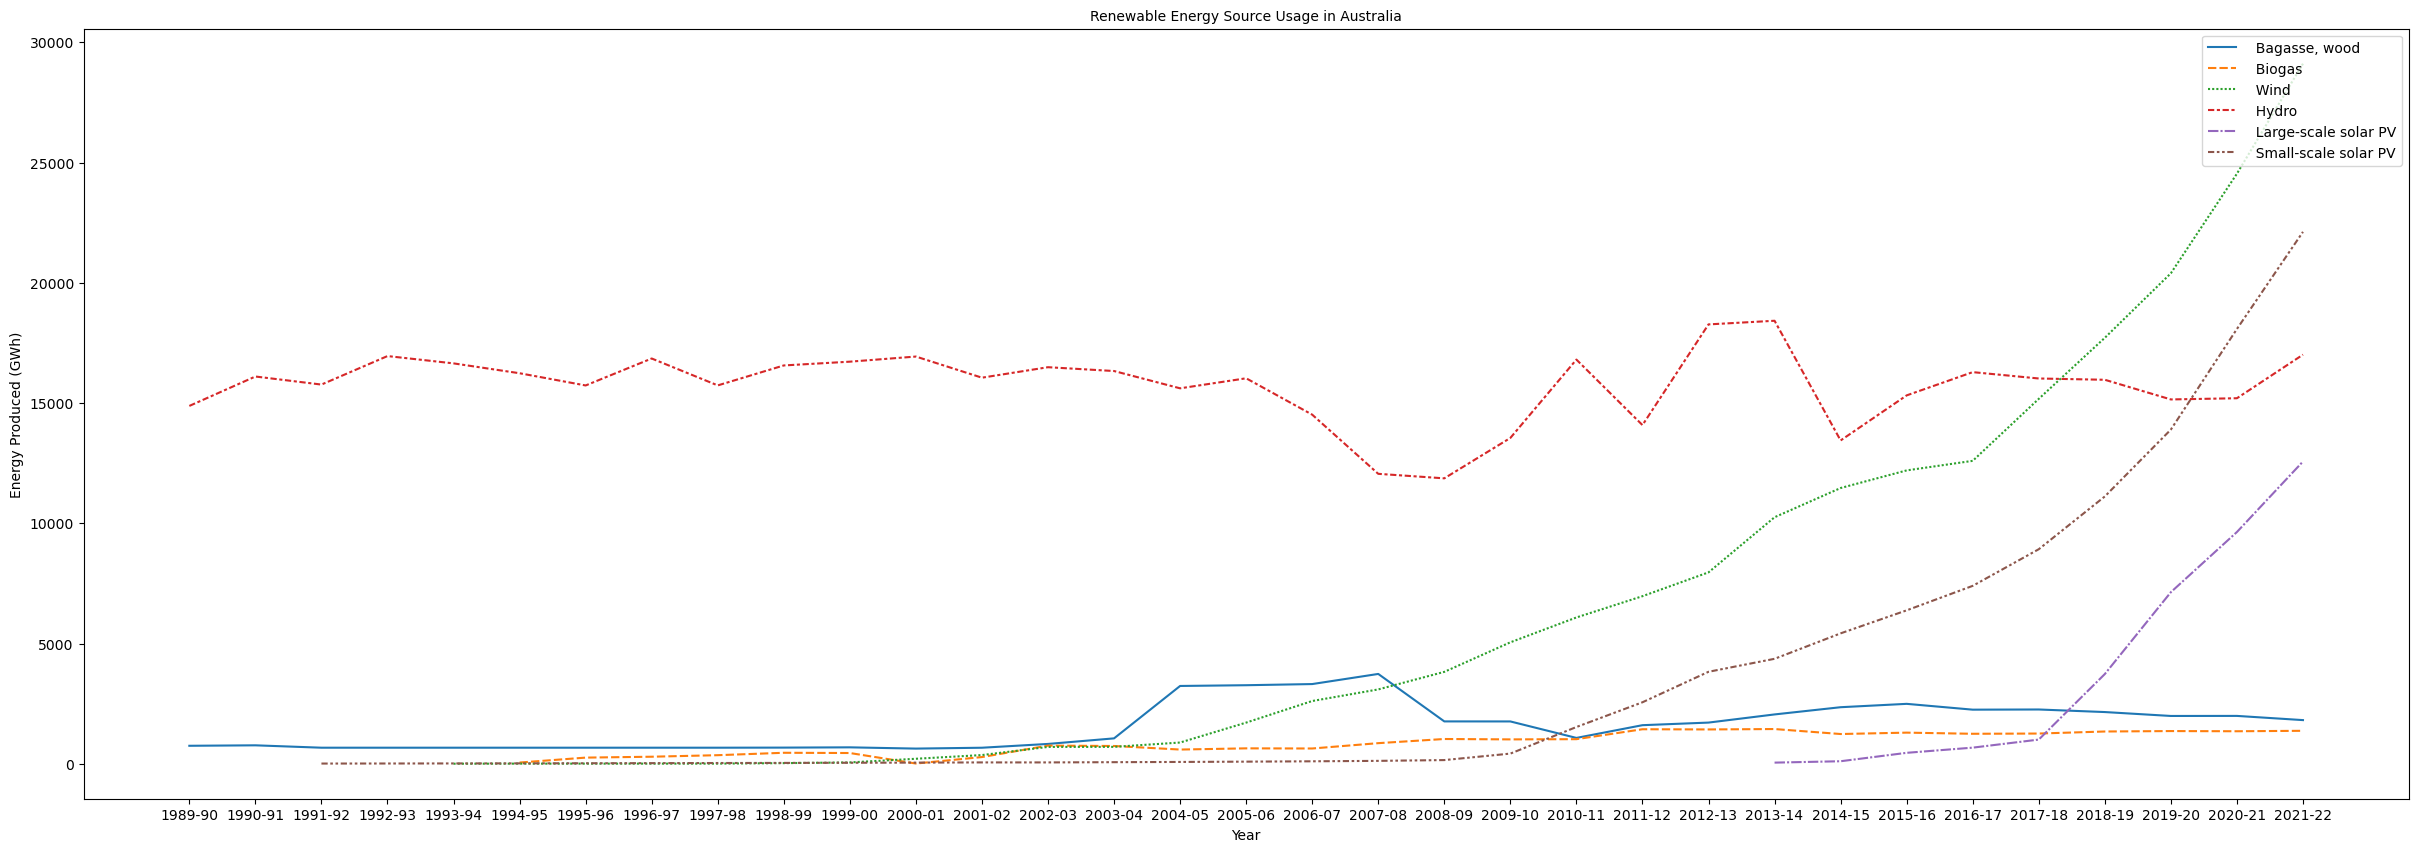

In [18]:
# Lets now visualise our Renewable Sources
# Resizing our plot [Must be placed prior to creation of plot instance]
plt.figure(figsize=(30, 10))

# Lets visualise our Non Renewable Energy Data Frame as a lineplot since it is a time series
renewLineplot = sns.lineplot(df_ausElecGen_Renew)

# Repositioning the legend
renewLineplot.legend(loc='upper right')

# Setting the position of the x and y labels
renewLineplot.set_xlabel('Year', fontsize=10)
renewLineplot.set_ylabel('Energy Produced (GWh)', fontsize=10)

# Adjusting the position of the title
renewLineplot.set_title('Renewable Energy Source Usage in Australia', fontsize=10)
renewLineplot.title.set_position([.5, 1.0])

# Display our plot
plt.show()

In [19]:
# Shortening visualiastion to be between 2001 and 2022

In [21]:
# Lets look if the data types are in datetiem format

print(df_ausElecGen_Renew.dtypes)

Unnamed: 0
  Bagasse, wood           object
  Biogas                  object
  Wind                    object
  Hydro                   object
  Large-scale solar PV    object
  Small-scale solar PV    object
  Geothermal              object
dtype: object


In [24]:
# They aren't, so let's convert them

# Resetting the index to have years as a column
df_ausElecGen_Renew.reset_index(inplace=True)

# Renaming the column
df_Renew_Filtered = df_ausElecGen_Renew.rename(columns={'index': 'Year'})

# Filtering the DataFrame
df_Renew_Filtered = df_Renew_Filtered[(df_Renew_Filtered['Year'] >= '2001') & (df_Renew_Filtered['Year'] <= '2022')]

# Setting the Year column as index
df_Renew_Filtered.set_index('Year', inplace=True)

# Display 
print(df_Renew_Filtered)

Unnamed: 0  level_0   Bagasse, wood       Biogas          Wind         Hydro  \
Year                                                                           
2001-02          12             669          281           364         16054   
2002-03          13           826.6          757         703.1         16490   
2003-04          14          1058.2        741.3           705       16331.1   
2004-05          15            3237          593           885       15612.2   
2005-06          16            3268          643        1713.1       16029.2   
2006-07          17            3316          637        2611.1         14517   
2007-08          18            3737          859        3093.1       12056.9   
2008-09          19          1763.4       1031.8        3823.8       11869.4   
2009-10          20          1761.8       1015.6        5051.7       13548.7   
2010-11          21            1077       1024.7        6084.9       16806.7   
2011-12          22        1606.306     

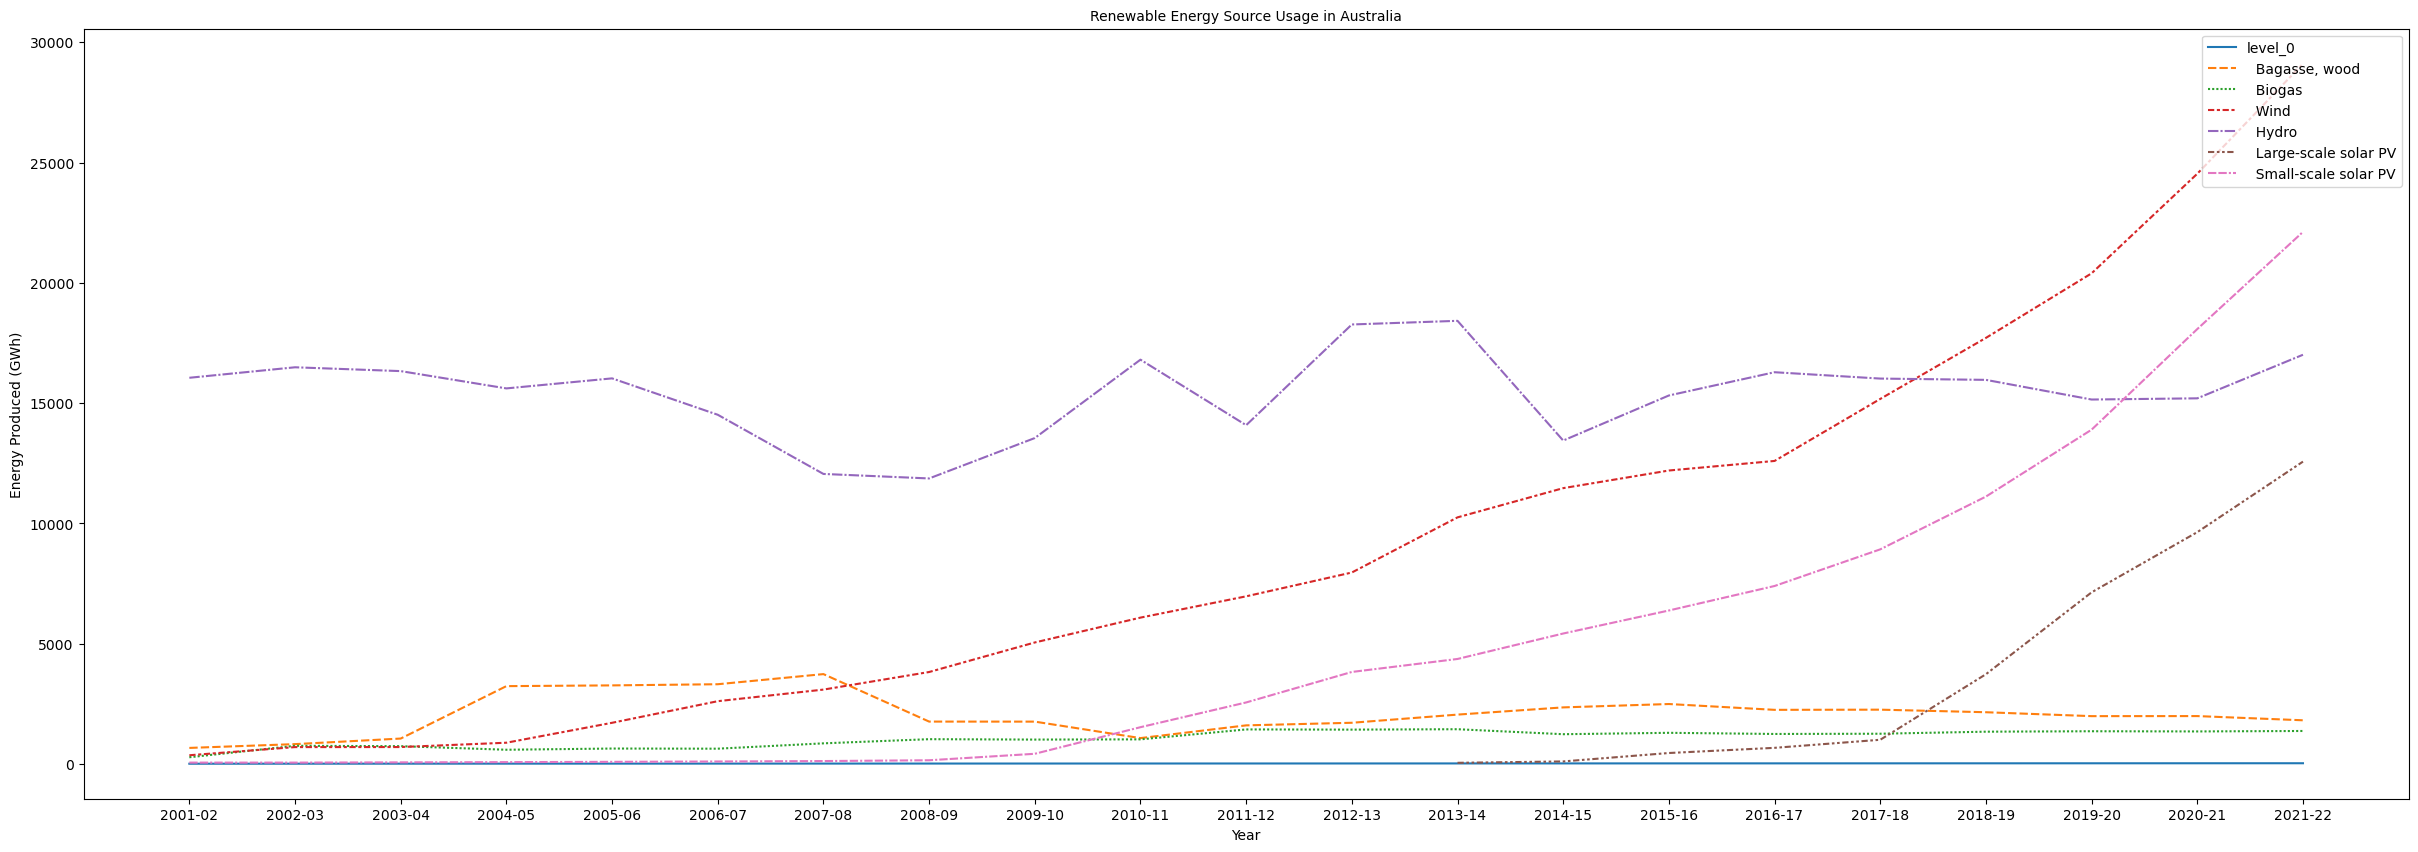

In [25]:
# Lets now visualise our Renewable Sources
# Resizing our plot [Must be placed prior to creation of plot instance]
plt.figure(figsize=(30, 10))

# Lets visualise our Non Renewable Energy Data Frame as a lineplot since it is a time series
renewLineplot = sns.lineplot(df_Renew_Filtered)

# Repositioning the legend
renewLineplot.legend(loc='upper right')

# Setting the position of the x and y labels
renewLineplot.set_xlabel('Year', fontsize=10)
renewLineplot.set_ylabel('Energy Produced (GWh)', fontsize=10)

# Adjusting the position of the title
renewLineplot.set_title('Renewable Energy Source Usage in Australia', fontsize=10)
renewLineplot.title.set_position([.5, 1.0])

# Display our plot
plt.show()

<h1>Background on the Renewable Energy Target</h1>

2001: Aim was to source two per cent of the nation's electricity generation from renewable sources.

2009: Aim increased to ensure renewable energy made up the equivalent of 20 per cent of Australia's electricity (41 000 GWh).

2011: Introduction of Large-scale Renewable Energy Target (LRET) and  Small-scale Renewable Energy Scheme (SRES).

2015: Large-scale Renewable Energy Target was reduced from 41 000 GWh to 33 000 GWh.

<h2>Large-scale Renewable Energy Target (LRET)</h2>

<strong>What?</strong>

1 Large-scale Generation Certificate (LGC) = 1 Megawatt Hour (MWh) of renewable energy generated by a power station

<strong>How?</strong>

Certificates are created and sold to incentivise the development of renewable energy power stations in Australia.

<strong>Example of systems that generate LGCs</strong>

- Wind farms
- Solar farms
- Hydro-electric power stations

<h2>Small-scale Renewable Energy Scheme (SRES)</h2>

<strong>What?</strong>

1 Small-scale Technology Certificate (STC) = 1 Megawatt hour (MWh) of generated electricity by a renewable energy system

<strong>How?</strong>

Certificates are created following the installation of an eligible system, and are calculated based on the amount of electricity a system produces or replaces.

<strong>Example of systems that generate STCs</strong>

- Solar Photovoltaic (PV) Panels
- Heat Pumps
- Solar hot water

<h2>A quick look at the Units of Energy</h2>

1 Megwatt Hour (MWh) = 0.001 Gigawatt Hour (GWh)


Given the RET goal of 33,000 GWh of energy being produced by renewables, this translates to:

33,000,000 (33 million) MWh of Energy 

Which further translates to 33,000,000 (33 million) LGCs/STCs

<h2>REC Summary Holdings</h2>

Link: https://www.rec-registry.gov.au/rec-registry/app/public/summary-holdings

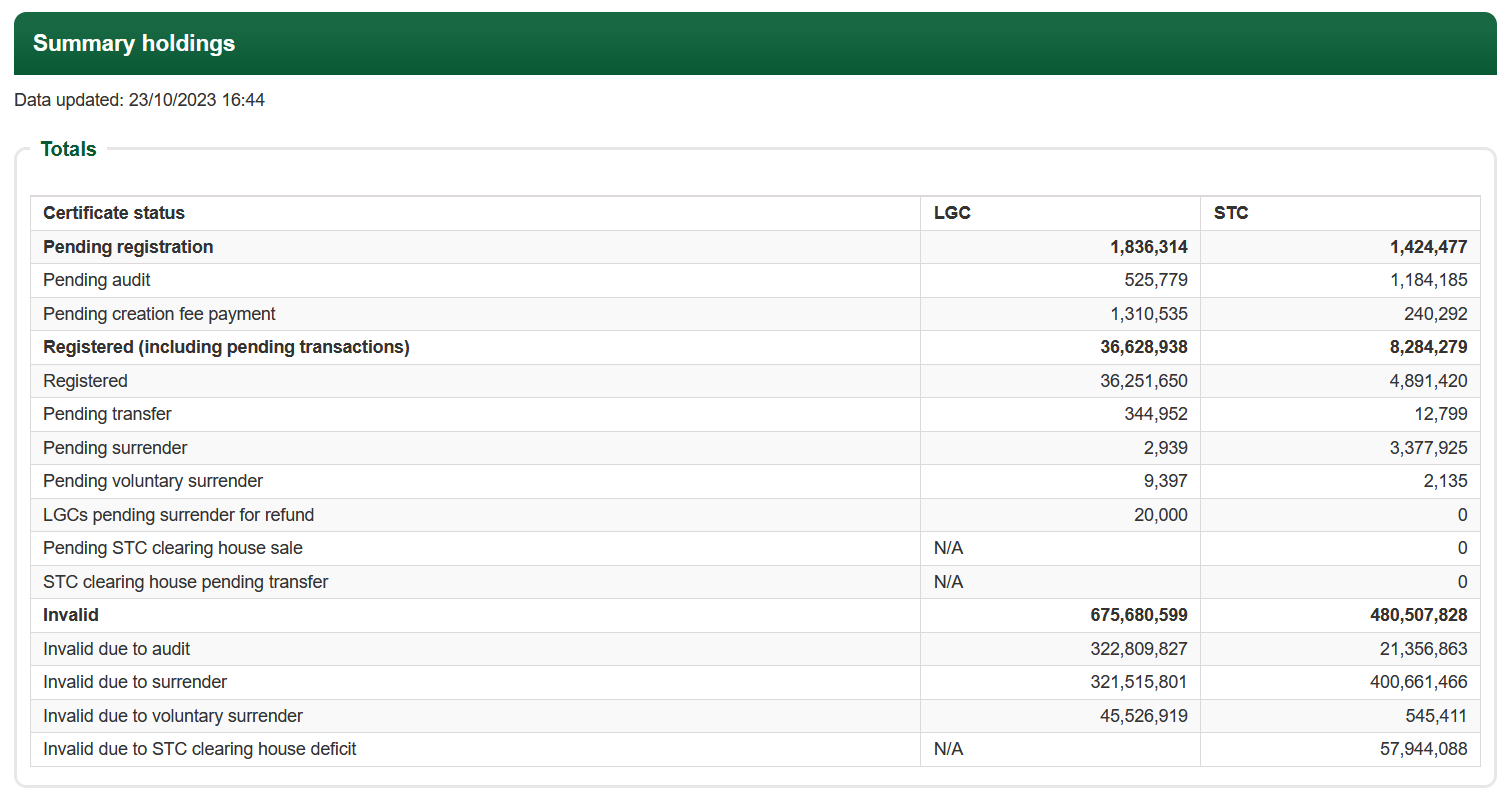

Next steps to measure the impact of the Renewable Energy Target on the development of Renewables:
- See if it is possible to plot time series data on the number of LGCs at a given time period and compare it with the growth of renewable energy sources